plot some things out to see the difference between v1.3 vs. v1.4 (with the same cuts as v1.3 and those 0.1mag shallower).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os
import pandas as pd
%matplotlib inline

#### plot format

In [2]:
fontsize = 18
rcparams = {}
rcparams['figure.figsize'] = (10, 6)
rcparams['axes.labelsize'] = fontsize
rcparams['legend.fontsize'] = fontsize-4
rcparams['axes.titlesize'] = fontsize
rcparams['axes.linewidth'] = 2
rcparams['axes.grid'] = True
for axis in ['x', 'y']:
    rcparams['%stick.labelsize'%axis] = fontsize-2
    rcparams['%stick.direction'%axis] = 'in'
    rcparams['%stick.major.size'%axis] = 5.5
    rcparams['%stick.minor.size'%axis] =  3.5
    rcparams['%stick.major.width'%axis] = 2
    rcparams['%stick.minor.width'%axis] = 1.5
rcparams['xtick.top'] = True
rcparams['ytick.right'] = True

# "load" the format params in
for key in rcparams: mpl.rcParams[key] = rcparams[key]

In [3]:
# outdir path
outdir = '/global/homes/a/awan/LSST/lsstRepos/ObsStrat/postwp/results-plots+/comparisons-v1.3-vs-v1.4/'
os.makedirs(outdir, exist_ok=True)

### read in the all-metrics file

In [4]:
data_dir = '/global/homes/a/awan/LSST/lsstRepos/ObsStrat/postwp/paper-data/summary_csv_v1.3/'
all_metrics_old = pd.read_csv('%s/static_metrics.csv' % (data_dir))

In [5]:
data_dir = '/global/homes/a/awan/LSST/lsstRepos/ObsStrat/postwp/paper-data/summary_csv_v1.4/'
all_metrics_new = pd.read_csv('%s/static_metrics.csv' % (data_dir))

In [6]:
data_dir = '/global/homes/a/awan/LSST/lsstRepos/ObsStrat/postwp/paper-data/summary_csv_v1.4_-0.1cuts/'
all_metrics_new_cuts = pd.read_csv('%s/static_metrics.csv' % (data_dir))

In [7]:
all_metrics_new_cuts

,name,Y1 effective survey area,median Y1 $i$-band coadded depth in effective survey area,std in Y1 $i$-band coadded depth in effective survey area,Y3 effective survey area,median Y3 $i$-band coadded depth in effective survey area,std in Y3 $i$-band coadded depth in effective survey area,Y6 effective survey area,median Y6 $i$-band coadded depth in effective survey area,std in Y6 $i$-band coadded depth in effective survey area,Y10 effective survey area,median Y10 $i$-band coadded depth in effective survey area,std in Y10 $i$-band coadded depth in effective survey area
0,agnddf_v1.4_10yrs.db,15164.88,25.10,0.16,15268.85,25.71,0.14,15201.44,26.05,0.14,15154.65,26.31,0.13
1,alt_roll_mod2_dust_sdf_0.20_v1.4_10yrs.db,16734.73,25.00,0.16,16378.82,25.54,0.18,15909.07,25.92,0.15,16027.99,26.19,0.13
2,baseline_2snapsv1.4_10yrs.db,14943.10,25.04,0.15,15148.78,25.65,0.13,14986.85,25.99,0.13,14926.47,26.25,0.12
3,baseline_v1.4_10yrs.db,15124.18,25.09,0.16,15250.44,25.69,0.14,15107.50,26.03,0.14,15048.22,26.29,0.13
4,bulges_bs_v1.4_10yrs.db,16865.19,24.99,0.16,17205.94,25.62,0.14,16903.37,25.96,0.14,16717.84,26.22,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,wfd_depth_scale0.90_v1.4_10yrs.db,15143.95,25.08,0.16,15239.74,25.69,0.13,15140.02,26.02,0.13,15086.78,26.29,0.13
71,wfd_depth_scale0.95_noddf_v1.4_10yrs.db,15268.06,25.17,0.17,15327.76,25.78,0.15,15263.18,26.12,0.14,15242.99,26.38,0.14
72,wfd_depth_scale0.95_v1.4_10yrs.db,15116.05,25.09,0.15,15237.32,25.71,0.14,15154.81,26.05,0.13,15131.31,26.31,0.13
73,wfd_depth_scale0.99_noddf_v1.4_10yrs.db,15254.06,25.18,0.17,15304.41,25.79,0.15,15258.15,26.14,0.14,15238.95,26.40,0.14


#### plot histograms for comparisons

In [8]:
colors = ['r', u'b', 'g', 'k']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

In [9]:
yrs = [1, 3, 6, 10]
key_maps = {'area': ['Y%s effective survey area '%f for f in yrs],
            'depth-med': ['median Y%s $i$-band coadded depth in effective survey area'%f for f in yrs],
            'depth-stddev': ['std in Y%s $i$-band coadded depth in effective survey area'%f for f in yrs],
           }

In [10]:
for key in key_maps:
    plt.clf()
    nrows, ncols = 3, 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    
    if key == 'area':
        bins = np.arange(3000, 19000, 50)
    elif key == 'depth-med':
        bins = np.arange(24.5, 27, 0.01)
    elif key == 'depth-stddev':
        bins = np.arange(0, 0.5, 0.001)
        
    for j, col in enumerate( key_maps[key] ):
        out, _, _ = axes[0].hist(all_metrics_old[col], histtype='step', color=colors[j], label=col, lw=2, bins=bins)
        axes[0].plot(all_metrics_old[col], [max(out) + np.std(out)] * len(all_metrics_old[col]) , '|', color=colors[j])
        
        out, _, _ = axes[1].hist(all_metrics_new[col], histtype='step',  label=col, lw=2, bins=bins, color=colors[j])
        axes[1].plot(all_metrics_new[col], [max(out) + np.std(out)] * len(all_metrics_new[col]) , '|', color=colors[j])
        
        out, _, _ = axes[2].hist(all_metrics_new_cuts[col], histtype='step',  label=col, lw=2, bins=bins, color=colors[j])
        axes[2].plot(all_metrics_new_cuts[col], [max(out) + np.std(out)] * len(all_metrics_new_cuts[col]) , '|', color=colors[j])
    #ax.set_yticks( range( ndbs ) )
    #ax.set_yticklabels( all_metrics['name'] ) #rotation=90)
    
    axes[0].legend(bbox_to_anchor=(1,1))
    for i in range(nrows):
        axes[i].set_yscale('log')
        
    axes[0].set_title('v1.3 dbs (%s dbs)' % (len(all_metrics_old[col])))
    axes[1].set_title('v1.4 dbs (%s dbs)' % (len(all_metrics_new[col])))
    axes[2].set_title('v1.4 dbs + 0.1shallower cuts')
    
    plt.gcf().set_size_inches(10, 10)
    #plt.suptitle(key, y=0.95, fontsize=20, fontweight='bold')
    filename = 'compare-hists_v1.3-vs-v1.4_%s.png' % key
    plt.savefig('%s/%s'%(outdir, filename), format= 'png', bbox_inches='tight')
    #plt.show()
    plt.close('all')
    
    print('saved %s ' % filename)

saved compare-hists_v1.3-vs-v1.4_area.png 
saved compare-hists_v1.3-vs-v1.4_depth-med.png 
saved compare-hists_v1.3-vs-v1.4_depth-stddev.png 


#### plot metrics for some cadences simulated in v1.3 vs v1.4

In [11]:
mapper = {'big_sky_dust_v1.3_10yrs': 'footprint_big_sky_dustv1.4_10yrs',
          'newB_v1.3_10yrs': 'footprint_newBv1.4_10yrs',
'twilight_neo_mod3_v1.3_10yrs': 'twilight_neo_mod3_v1.4_10yrs',
'wfd_75_v1.3_10yrs': 'wfd_depth_scale0.75_noddf_v1.4_10yrs',
'baseline_2snap_v1.3_10yrs': 'baseline_2snapsv1.4_10yrs',
'bulges_cadence_bulge_wfdv1.3_10yrs': 'bulges_cadence_bulge_wfd_v1.4_10yrs',
'bulges_bulge_wfdv1.3_10yrs': 'bulges_bulge_wfd_v1.4_10yrs',
'twilight_neo_mod1_v1.3_10yrs': 'twilight_neo_mod1_v1.4_10yrs',
'wfd_95_v1.3_10yrs': 'wfd_depth_scale0.95_v1.4_10yrs',
'wfd_70_v1.3_10yrs': 'wfd_depth_scale0.70_v1.4_10yrs',
'euclid_ddf_v1.3_10yrs': 'euclidddf_v1.4_10yrs',
'no_gp_north_v1.3_10yrs': 'footprint_no_gp_northv1.4_10yrs',
'dcr_nham1_v1.3_10yrs': 'dcr_nham1_v1.4_10yrs',
'bluer_footprint_v1.3_10yrs': 'footprint_bluer_footprintv1.4_10yrs',
'wfd_standard_v1.3_10yrs': 'footprint_standard_goalsv1.4_10yrs',
'newA_v1.3_10yrs': 'footprint_newAv1.4_10yrs',
'twilight_neo_mod4_v1.3_10yrs': 'twilight_neo_mod4_v1.4_10yrs',
'twilight_neo_mod2_v1.3_10yrs': 'twilight_neo_mod2_v1.4_10yrs',
'bulges_cadence_bsv1.3_10yrs': 'bulges_cadence_bs_v1.4_10yrs',
'add_mag_clouds_v1.3_10yrs': 'footprint_add_mag_cloudsv1.4_10yrs',
'big_sky_nouiy_v1.3_10yrs': 'footprint_big_sky_nouiyv1.4_10yrs',
'big_sky_v1.3_10yrs': 'footprint_big_skyv1.4_10yrs',
'wfd_65_v1.3_10yrs': 'wfd_depth_scale0.65_v1.4_10yrs',
'bulges_bsv1.3_10yrs': 'bulges_bs_v1.4_10yrs',
'dcr_nham3_v1.3_10yrs': 'dcr_nham3_v1.4_10yrs',
'stuck_rolling_v1.3_10yrs': 'footprint_stuck_rollingv1.4_10yrs',
'wfd_85_v1.3_10yrs': 'wfd_depth_scale0.85_v1.4_10yrs',
'bulges_i_heavyv1.3_10yrs': 'bulges_i_heavy_v1.4_10yrs',
'wfd_80_v1.3_10yrs': 'wfd_depth_scale0.80_v1.4_10yrs',
'bulges_cadence_i_heavyv1.3_10yrs': 'bulges_cadence_i_heavy_v1.4_10yrs',
'baseline_v1.3_10yrs': 'baseline_v1.4_10yrs',
'wfd_90_v1.3_10yrs': 'wfd_depth_scale0.90_v1.4_10yrs',
'dcr_nham2_v1.3_10yrs': 'dcr_nham2_v1.4_10yrs',
         }



In [12]:
ind_1, ind_2 = [], []
for db_1 in mapper:
    ind_1.append( np.where( all_metrics_old['name'].values == '%s.db' % db_1 )[0][0] )
    ind_2.append( np.where( all_metrics_new_cuts['name'].values == '%s.db' % mapper[db_1] )[0][0] )

In [13]:
tag_col_map = {}
for yr in [1, 3, 6, 10]:
    tag_col_map['Y%s effective survey area ' % yr] = 'y%s-area' % yr
    tag_col_map['median Y%s $i$-band coadded depth in effective survey area' % yr] = 'y%s-depth-med' % yr
    tag_col_map['std in Y%s $i$-band coadded depth in effective survey area' % yr] = 'y%s-depth-stddev' % yr

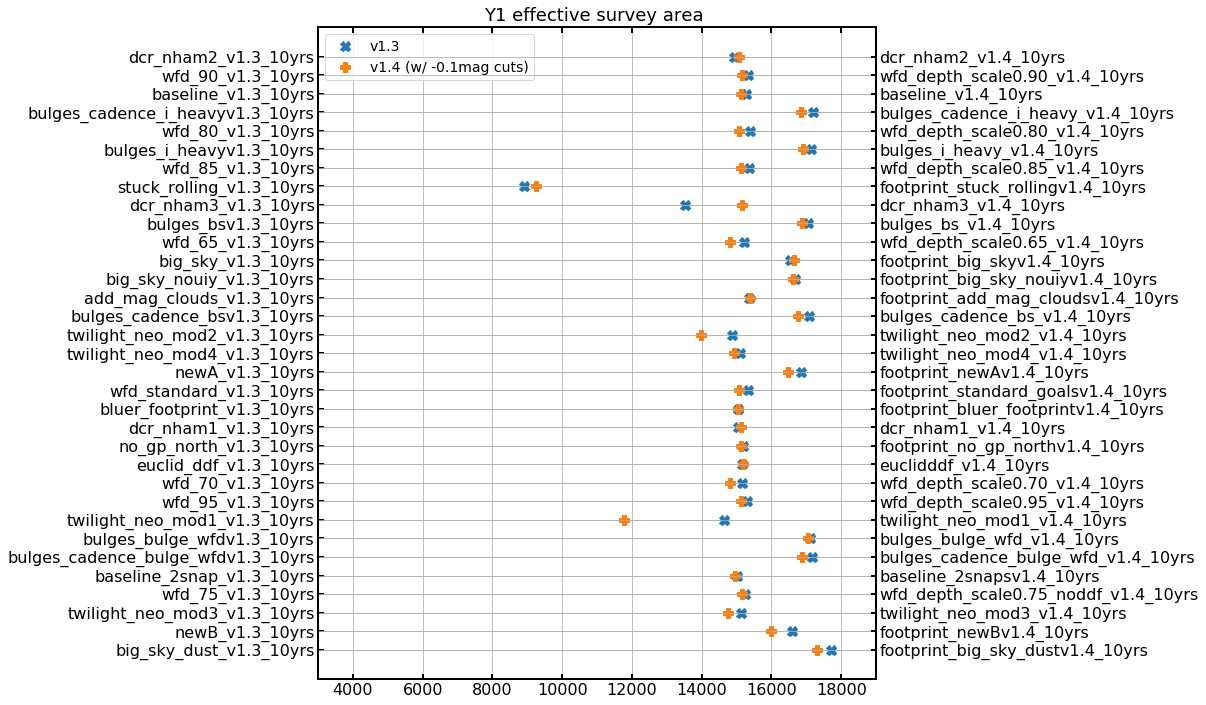

saved compare_v1.3-vs-v1.4_y1-area.png 


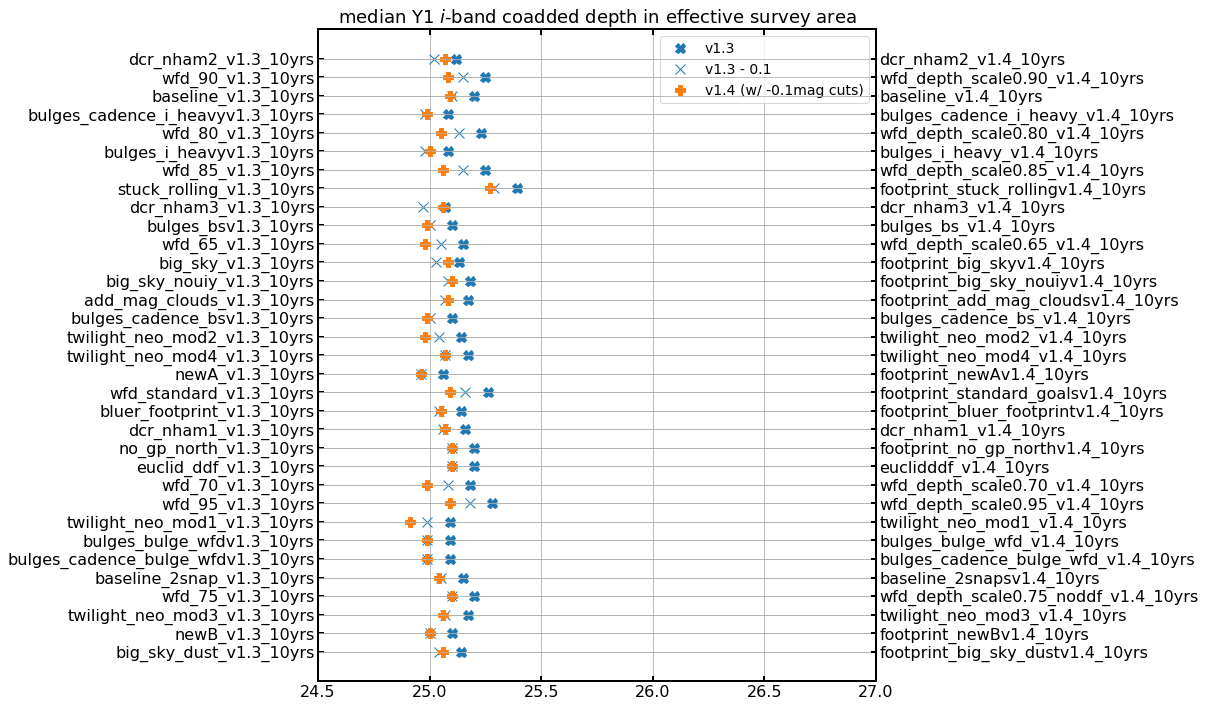

saved compare_v1.3-vs-v1.4_y1-depth-med.png 


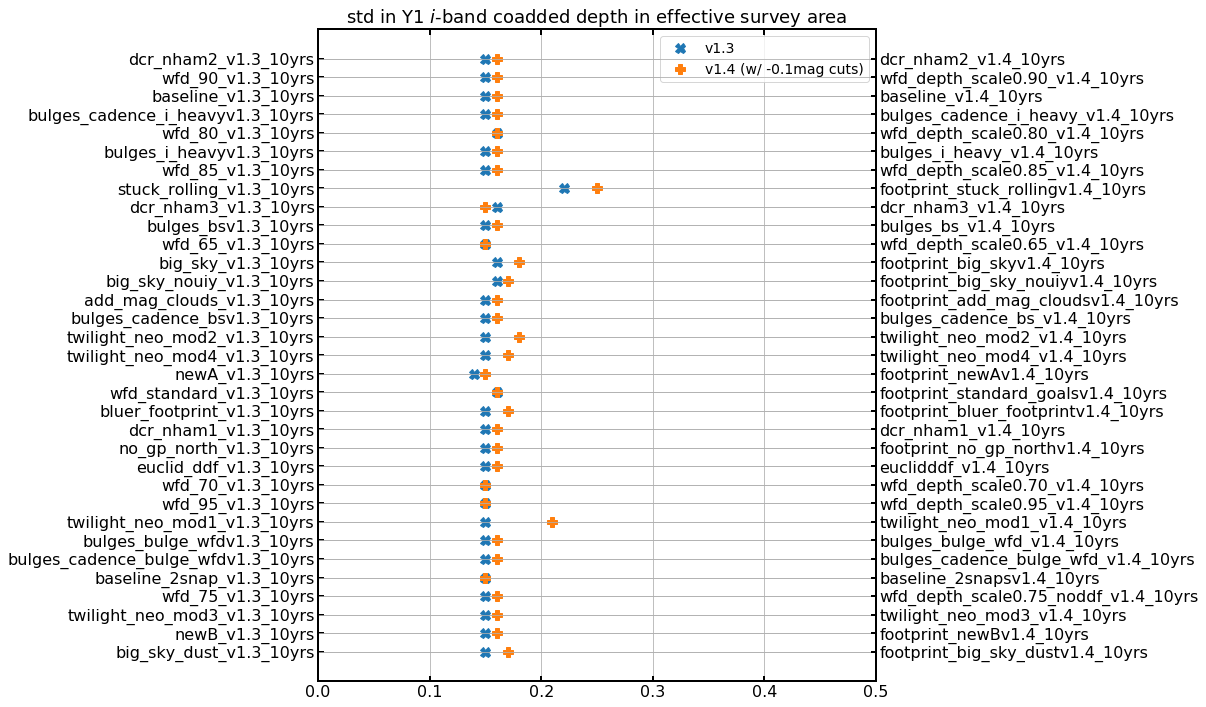

saved compare_v1.3-vs-v1.4_y1-depth-stddev.png 


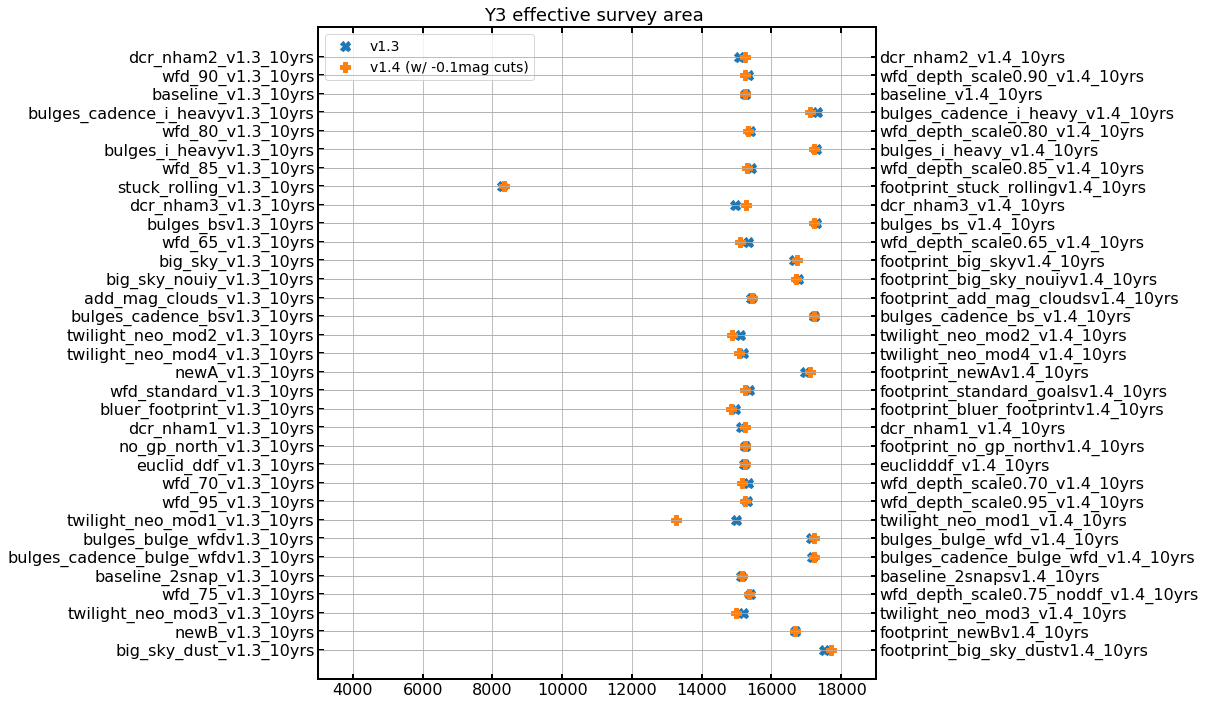

saved compare_v1.3-vs-v1.4_y3-area.png 


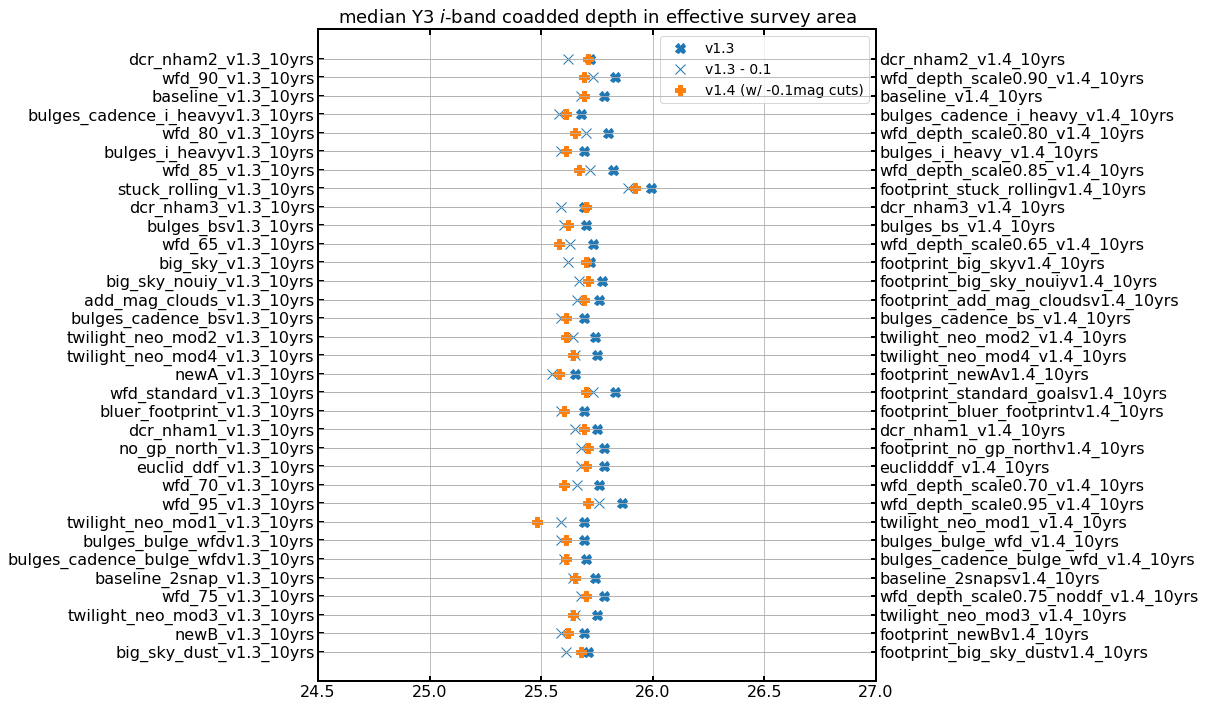

saved compare_v1.3-vs-v1.4_y3-depth-med.png 


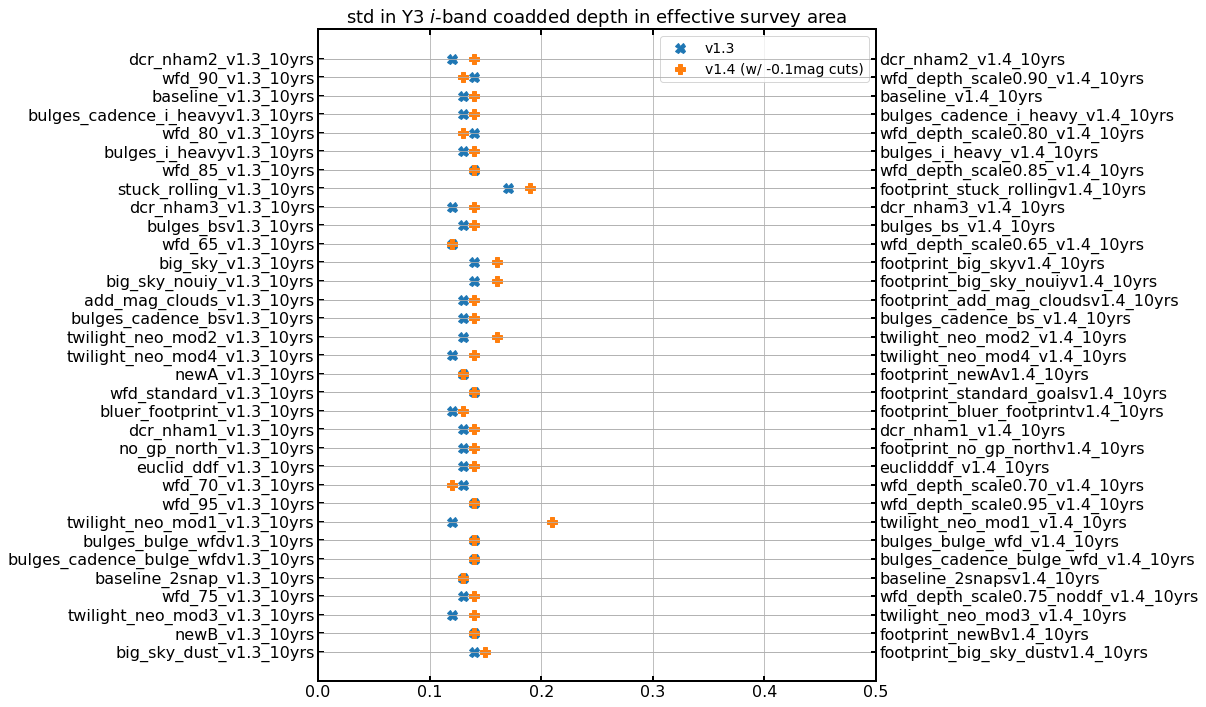

saved compare_v1.3-vs-v1.4_y3-depth-stddev.png 


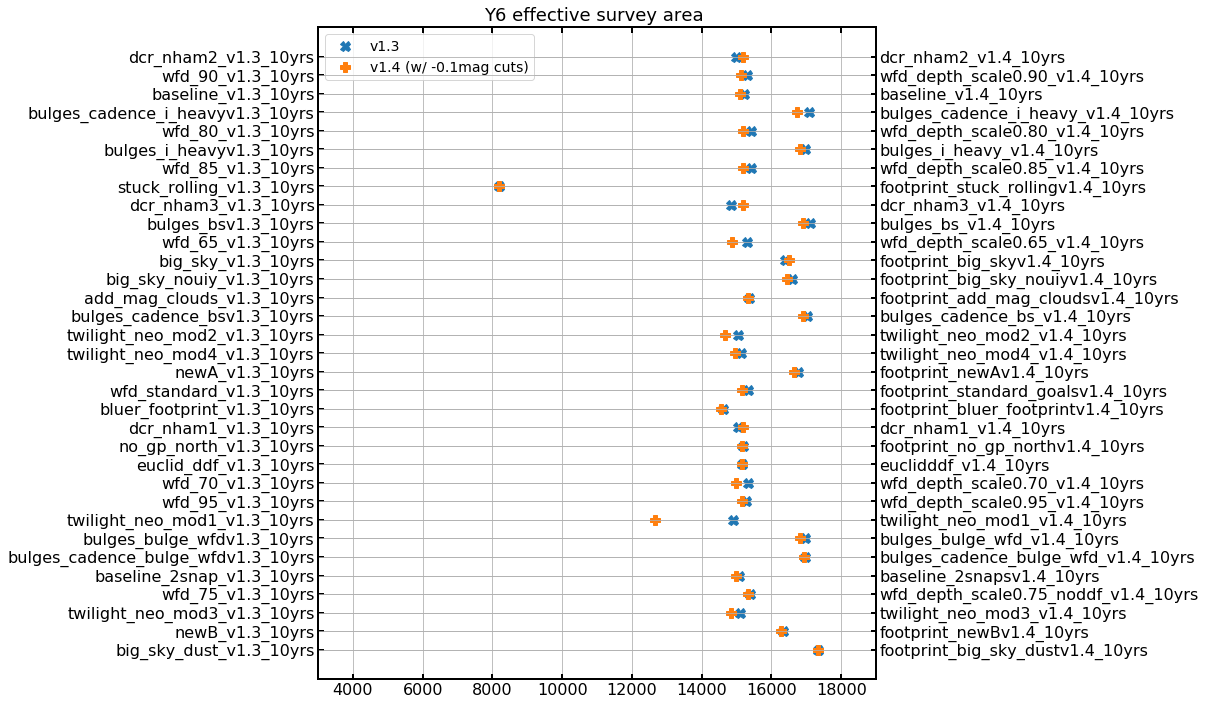

saved compare_v1.3-vs-v1.4_y6-area.png 


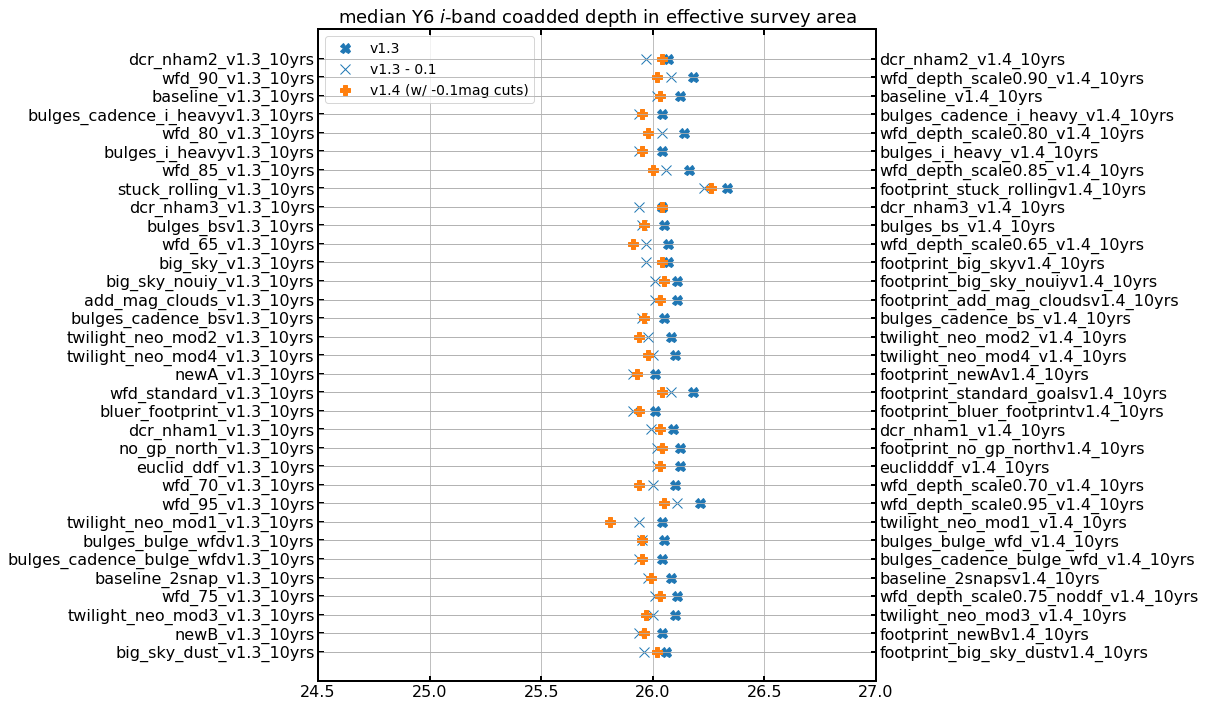

saved compare_v1.3-vs-v1.4_y6-depth-med.png 


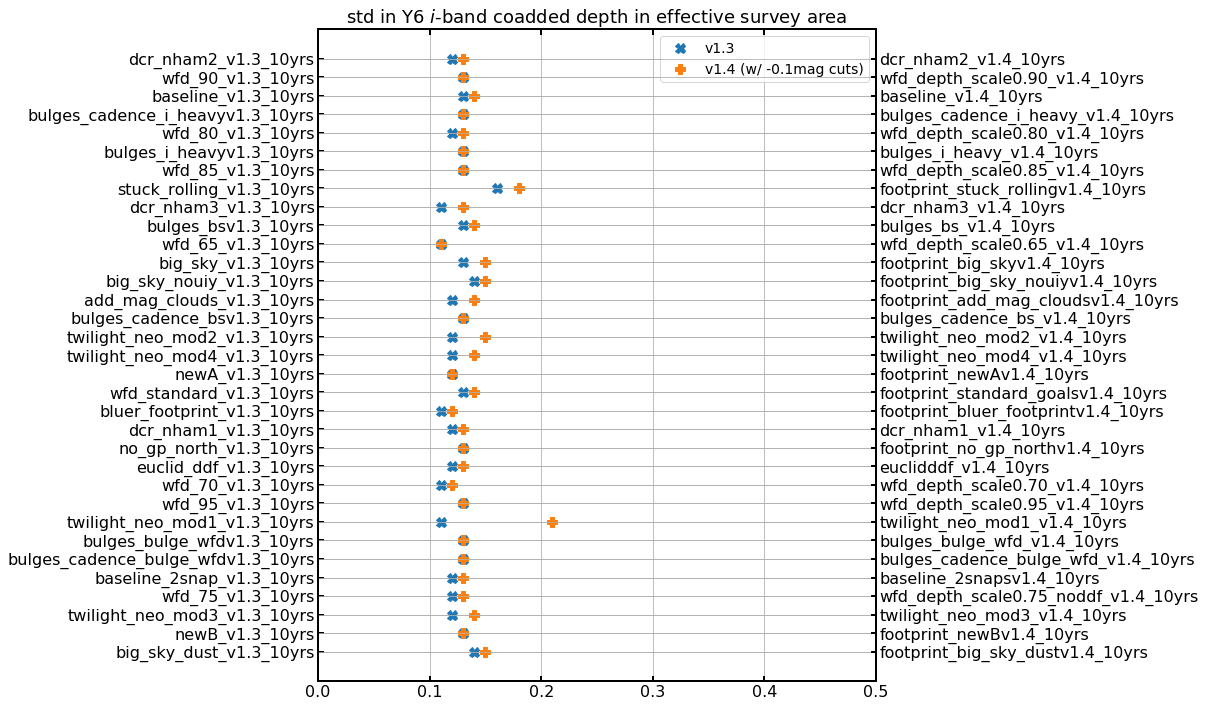

saved compare_v1.3-vs-v1.4_y6-depth-stddev.png 


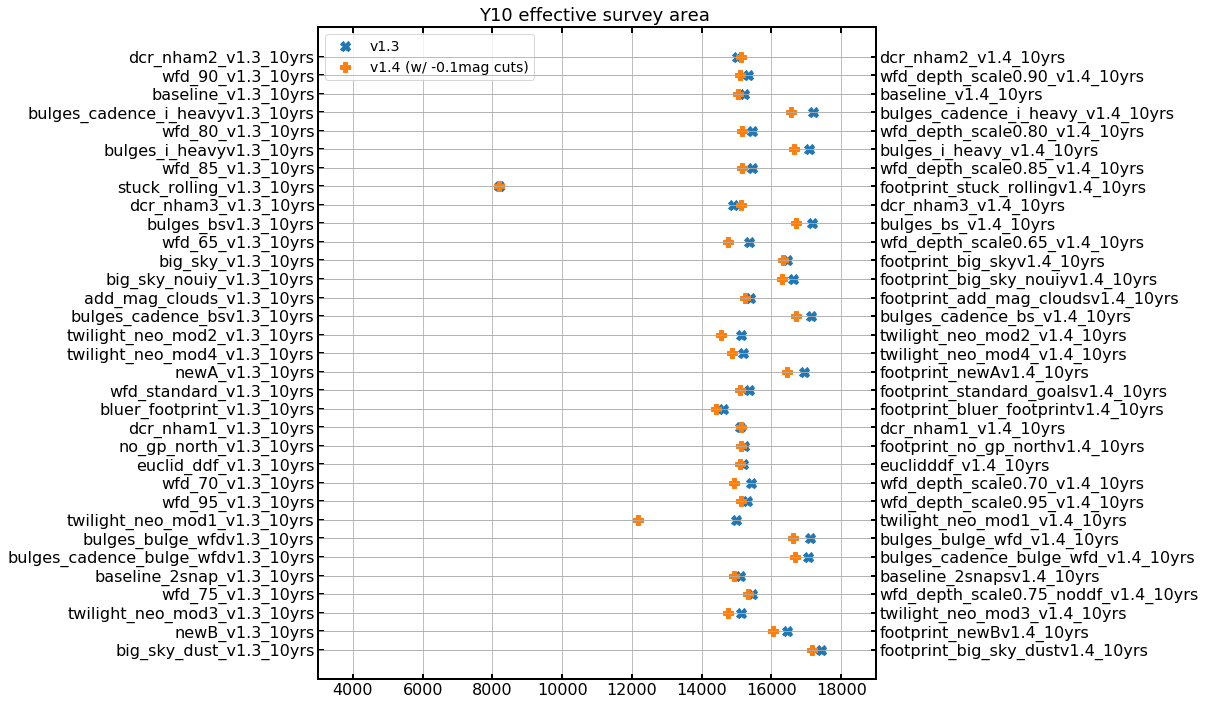

saved compare_v1.3-vs-v1.4_y10-area.png 


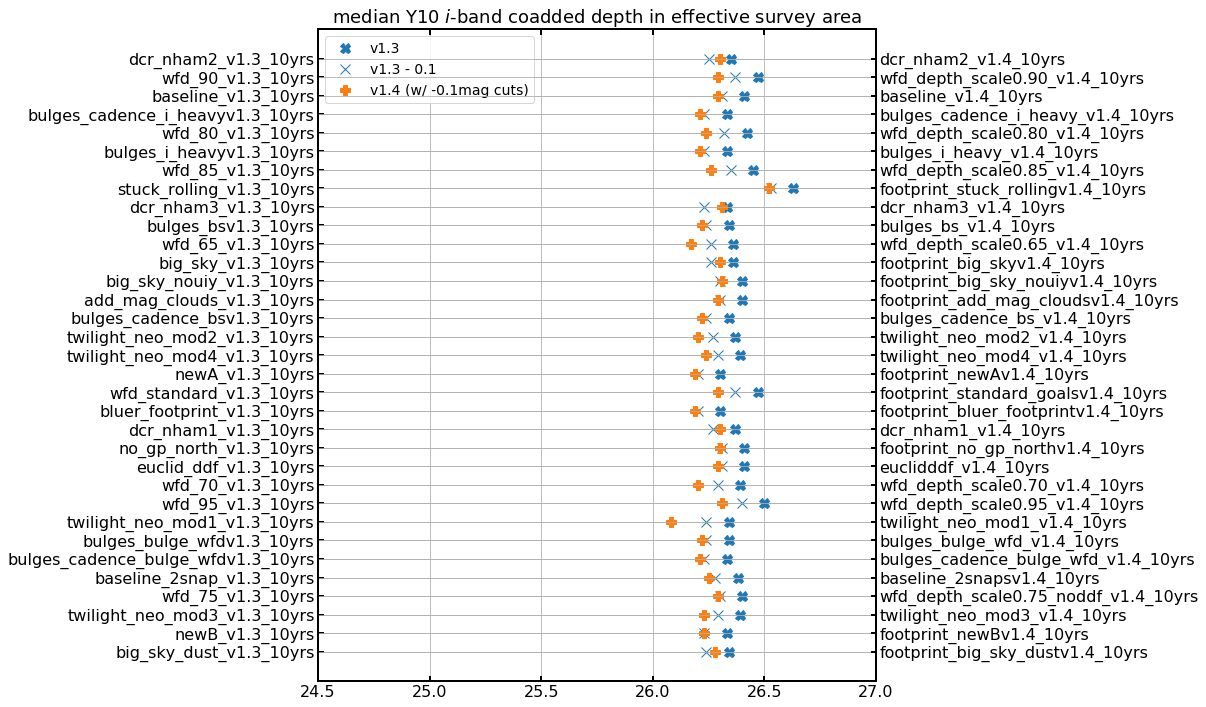

saved compare_v1.3-vs-v1.4_y10-depth-med.png 


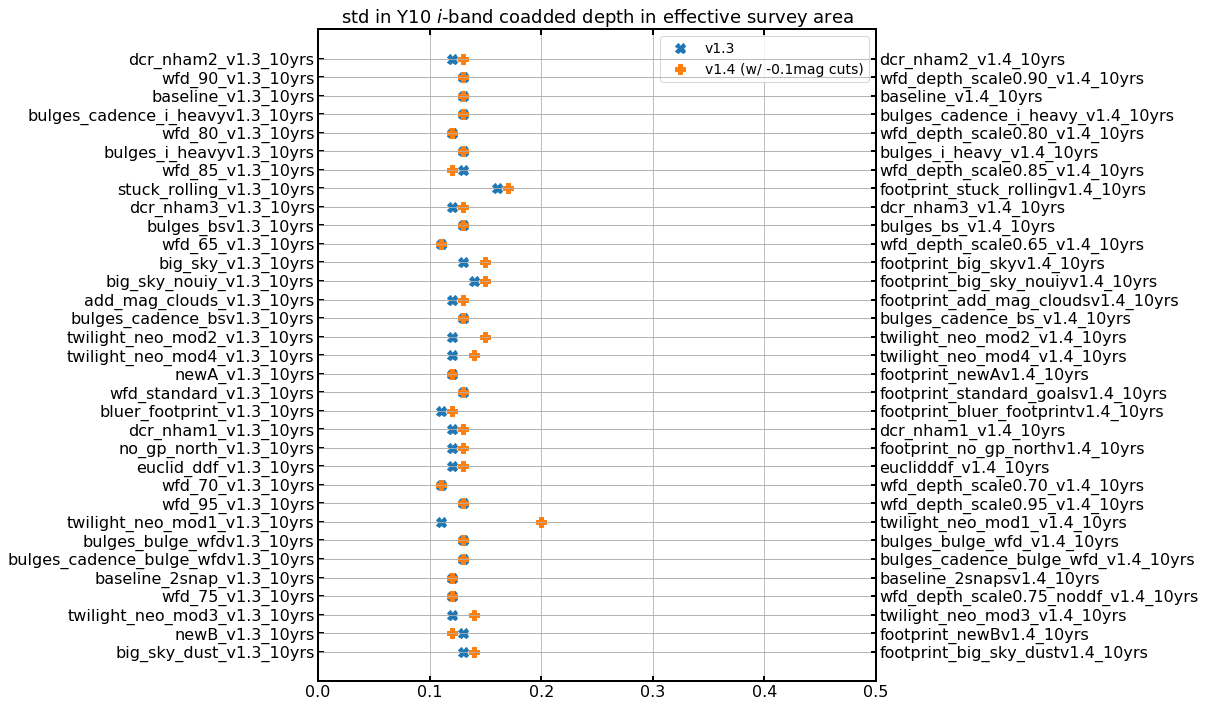

saved compare_v1.3-vs-v1.4_y10-depth-stddev.png 


In [14]:
for col in all_metrics_new_cuts:
    if col != 'name' and col != 'group':
        plt.clf()
        
        p = plt.plot(all_metrics_old[col].values[ind_1], range(len(ind_1)), 'X', markersize=10,label='v1.3')
        if col.__contains__('median'):
            plt.plot(all_metrics_old[col].values[ind_1]-0.1, range(len(ind_1)), 'x', markersize=10, label='v1.3 - 0.1', color=p[0].get_color())
            
        plt.plot(all_metrics_new_cuts[col].values[ind_2], range(len(ind_2)),  'P', markersize=10, label='v1.4 (w/ -0.1mag cuts)')
        # plot details
        plt.title(col)
        ax1 = plt.gca()
        ax1.legend(loc='best')
        ax1.set_yticks( range( len(ind_1) ) )
        ax1.set_yticklabels(  [f.split('.db')[0] for f in all_metrics_old['name'].values[ind_1]] ) #, rotation=90)
        
        if col.__contains__('median'):
            ax1.set_xlim(24.5, 27)
        elif col.__contains__('std'):
            ax1.set_xlim(0, 0.5)
        else:
            ax1.set_xlim(3000, 19000)
        
        # twix axis
        ax2 = ax1.twinx()
        ax2.set_ylim(ax1.get_ylim())
        ax2.set_yticks( range( len(ind_2) ) )
        ax2.set_yticklabels(  [f.split('.db')[0] for f in all_metrics_new_cuts['name'].values[ind_2]] ) #, rotation=90)
        # fig size
        plt.gcf().set_size_inches(10, 12)
        # save file
        filename = 'compare_v1.3-vs-v1.4_%s.png' % tag_col_map[col]
        plt.savefig('%s/%s'%(outdir, filename), format= 'png', bbox_inches='tight')
        # show plot
        plt.show() 
        #plt.close('all')
        
        print('saved %s ' % filename)

In [15]:
# check difference in median depth between the different years
old, new = [], []
for col in all_metrics_new_cuts:
    if col.__contains__('median'):
        print(col)
        med1 = np.median(all_metrics_old[col].values[ind_1])
        med2 = np.median(all_metrics_new_cuts[col].values[ind_2] )
        print( 'v1.3 vs. v1.4: %s vs. %s\n' % (med1, med2 ) )

        old.append(med1)
        new.append(med2)
            
print('diffs for v1.3: Y3-Y1, Y6-Y3, Y10-Y6: %s' % np.diff(old) )
print('diffs for v1.4: Y3-Y1, Y6-Y3, Y10-Y6: %s' % np.diff(new) )

median Y1 $i$-band coadded depth in effective survey area
v1.3 vs. v1.4: 25.15 vs. 25.06

median Y3 $i$-band coadded depth in effective survey area
v1.3 vs. v1.4: 25.74 vs. 25.65

median Y6 $i$-band coadded depth in effective survey area
v1.3 vs. v1.4: 26.08 vs. 25.99

median Y10 $i$-band coadded depth in effective survey area
v1.3 vs. v1.4: 26.37 vs. 26.25

diffs for v1.3: Y3-Y1, Y6-Y3, Y10-Y6: [0.59 0.34 0.29]
diffs for v1.4: Y3-Y1, Y6-Y3, Y10-Y6: [0.59 0.34 0.26]
